<a href="https://colab.research.google.com/github/KimGiheung/GDSC/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 타이타닉 데이터 세트 시각화

##  
연령 분포: 승객들의 연령 분포를 히스토그램과 KDE를 통해 보여줍니다.  
  
운임 분포: 티켓 가격의 분포를 히스토그램과 KDE로 나타냅니다.  
  
성별에 따른 생존율: 성별(0은 남성, 1은 여성)에 따른 생존율을 막대 그래프로 비교합니다.
    
객실 등급별 생존율: 객실 등급(Pclass)별 생존율을 막대 그래프로 보여줍니다.   
  
승선 항구별 승객 분포: 승선 항구(Embarked)별 승객 수를 막대 그래프로 나타냅니다.    
  


In [2]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##1. 데이터 로드 및 기본 확인


In [7]:
# 데이터를 로드합니다
data = pd.read_csv('/content/drive/MyDrive/dataset/train_and_test2.csv')

# 데이터의 처음 몇 줄을 확인합니다
data.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


# 2. 데이터 전처리

In [9]:
# 결측치 확인
data.isnull().sum()

# 불필요한 'zero' 열들 제거
zero_columns = [col for col in data.columns if 'zero' in col]
data = data.drop(columns=zero_columns)

# 변경 후 데이터 확인
data.head()

,Passengerid,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,0,3,2.0,0
1,2,38.0,71.2833,1,1,0,1,0.0,1
2,3,26.0,7.9250,1,0,0,3,2.0,1
3,4,35.0,53.1000,1,1,0,1,2.0,1
4,5,35.0,8.0500,0,0,0,3,2.0,0


#3. 기술 통계 및 데이터 탐색


In [10]:
# 기술 통계 확인
description = data.describe()
print(description)

       Passengerid          Age         Fare          Sex        sibsp  \
count  1309.000000  1309.000000  1309.000000  1309.000000  1309.000000   
mean    655.000000    29.503186    33.281086     0.355997     0.498854   
std     378.020061    12.905241    51.741500     0.478997     1.041658   
min       1.000000     0.170000     0.000000     0.000000     0.000000   
25%     328.000000    22.000000     7.895800     0.000000     0.000000   
50%     655.000000    28.000000    14.454200     0.000000     0.000000   
75%     982.000000    35.000000    31.275000     1.000000     1.000000   
max    1309.000000    80.000000   512.329200     1.000000     8.000000   

             Parch       Pclass     Embarked     2urvived  
count  1309.000000  1309.000000  1307.000000  1309.000000  
mean      0.385027     2.294882     1.492731     0.261268  
std       0.865560     0.837836     0.814626     0.439494  
min       0.000000     1.000000     0.000000     0.000000  
25%       0.000000     2.000000  

In [11]:
# 고유값 개수 확인
unique_value = data.nunique()
print(unique_value)

Passengerid    1309
Age              98
Fare            281
Sex               2
sibsp             7
Parch             8
Pclass            3
Embarked          3
2urvived          2
dtype: int64


In [12]:
# 결측치 확인
missing_values = data.isnull().sum()
print(missing_values)

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       2
2urvived       0
dtype: int64


In [17]:
# Embarked 열에서 가장 흔한 값 찾기
most_common_value = data['Embarked'].mode()[0]

# 결측치를 가장 흔한 값으로 대체
data['Embarked'].fillna(most_common_value, inplace=True)

# 다시 결측치 확인 - 없음
print(data.isnull().sum())

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Parch          0
Pclass         0
Embarked       0
2urvived       0
dtype: int64


#4. 데이터 시각화

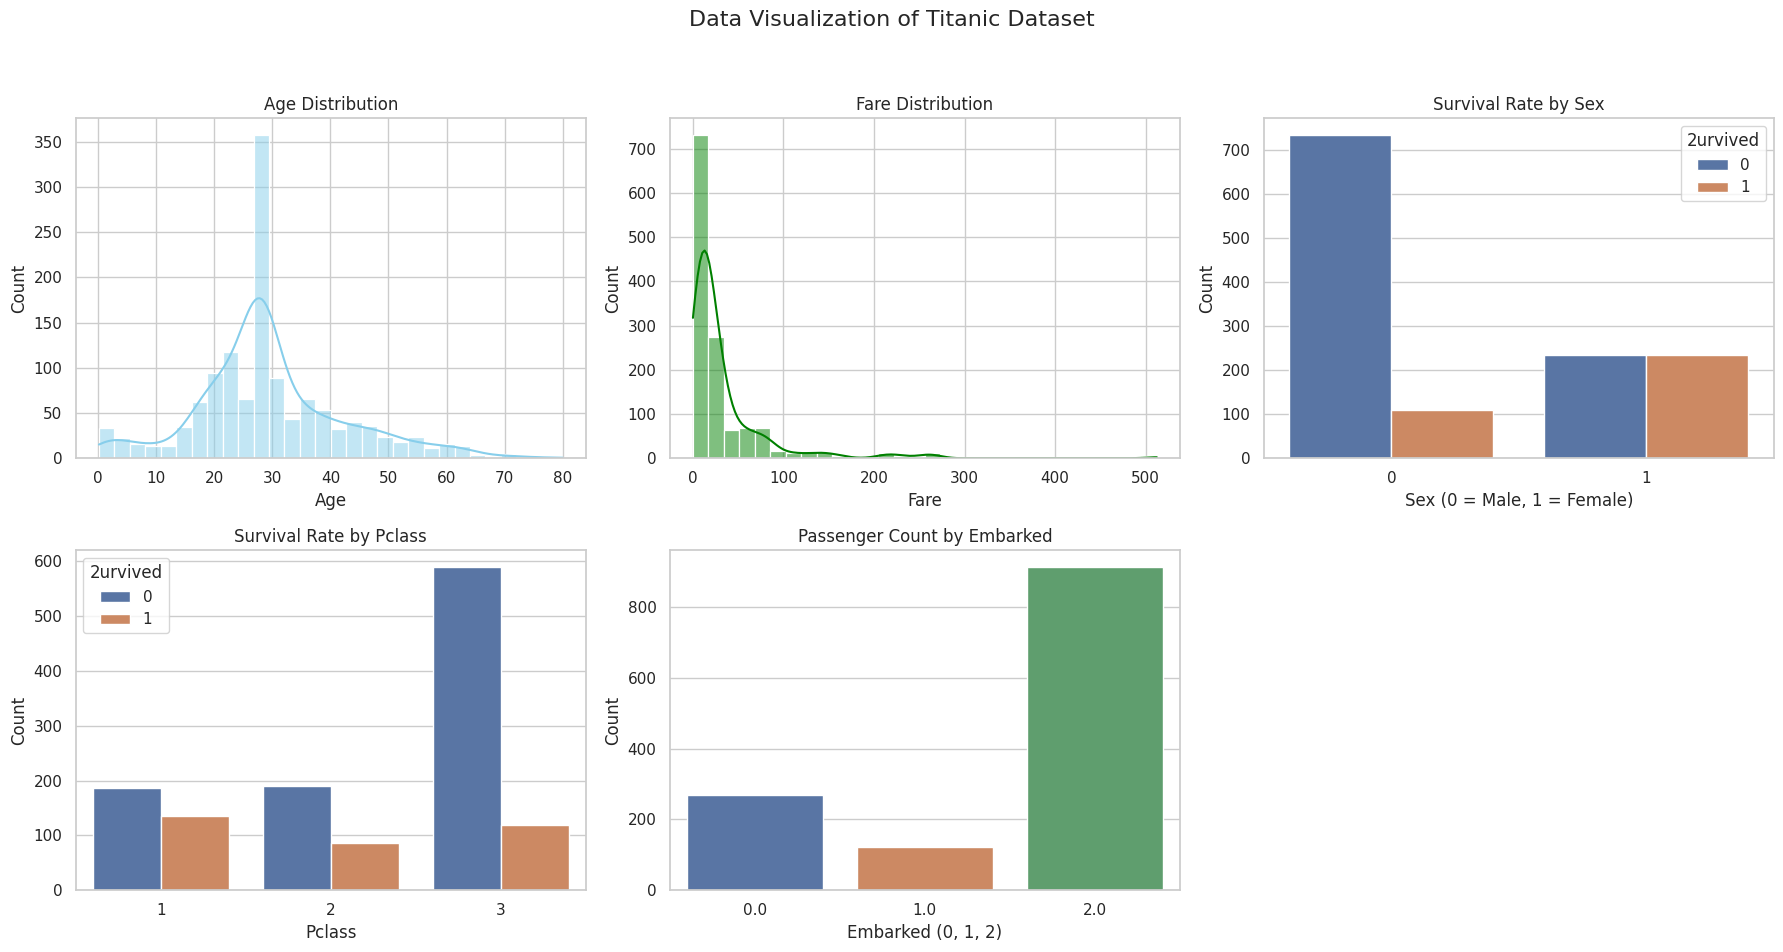

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 시각화 스타일
sns.set(style="whitegrid")

# 서브플롯
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Data Visualization of Titanic Dataset', fontsize=16)

# 연령 분포
sns.histplot(data['Age'].dropna(), bins=30, ax=axes[0, 0], kde=True, color='skyblue')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# 운임 분포
sns.histplot(data['Fare'].dropna(), bins=30, ax=axes[0, 1], kde=True, color='green')
axes[0, 1].set_title('Fare Distribution')
axes[0, 1].set_xlabel('Fare')
axes[0, 1].set_ylabel('Count')

# 성별-생존율
sns.countplot(x='Sex', hue='2urvived', data=data, ax=axes[0, 2])
axes[0, 2].set_title('Survival Rate by Sex')
axes[0, 2].set_xlabel('Sex (0 = Male, 1 = Female)')
axes[0, 2].set_ylabel('Count')

# 객실 등급-생존율
sns.countplot(x='Pclass', hue='2urvived', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Survival Rate by Pclass')
axes[1, 0].set_xlabel('Pclass')
axes[1, 0].set_ylabel('Count')

# 승선 항구별 승객 분포
sns.countplot(x='Embarked', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Passenger Count by Embarked')
axes[1, 1].set_xlabel('Embarked (0, 1, 2)')
axes[1, 1].set_ylabel('Count')

axes[1, 2].axis('off')
# visualization
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# 5. 데이터 분석

##6. 간단한 모델링
### model : RandomForestClassifier
### 평가지표: acc

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(data[['Age', 'Fare']], data['2urvived'], test_size=0.2)

# 모델 학습
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 모델 평가
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.6641221374045801
